# Unstable linear system with proportional controller
**Author: Victor Ardulov**

*Date: April 10, 2018*

## Introduction
This file contains a python reimplementation of the work presented in [(Proctor et al.)](https://epubs.siam.org/doi/abs/10.1137/15M1013857). The code below sets up and executes a linear system with proportional controller to demonstrate the abilities of the DMD with control code found in `control.py`

We begin by importing the necessary tools for visualization and modeling:

In [1]:
import numpy as np
import numpy.random as r

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
sns.set(font_scale=1.4)

from online_dmd.control import DMDc

## Generating the data

We model the following system:
$$
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}_{k+1} = \begin{bmatrix}
1.5 & 0 \\
0 & 0.1
\end{bmatrix} \begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}_{k} + 
\begin{bmatrix}
1 \\
0
\end{bmatrix}
u_k
$$

Where $u_k$ is our proportional control, implying:
$$
u_k = K[x_1]_k
$$
and $K = -1$

In [28]:
T = 5
A_true = np.matrix([[1.5, 0], [0, .1]])
B_true = np.matrix([[1, 0]])
K = -1
u_k = lambda x: -x[0]
X = np.zeros((T, 2))
X[0, :] = np.array([4, 7])
Y = np.zeros((T-1, 1))
X_auto = np.zeros_like(X)
X_auto[0, :] = np.array([4, 7])

for k in range(T-1):
    Y[k, 0] = u_k(X[k, :])
    X[k+1, :] = np.matmul(X[k, :], A_true.T) +  Y[k, 0] * B_true
    X_auto[k+1, :] = np.matmul(X_auto[k, :], A_true.T)

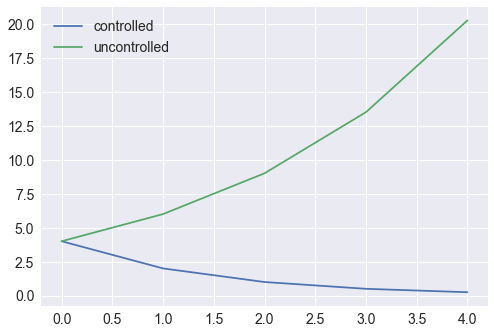

In [29]:
plt.plot(X[:, 0], label='controlled')
plt.plot(X_auto[:, 0], label='uncontrolled')
plt.legend()
plt.show()

## Model-fitting

Fit the DMDc models and print the predicted $\hat{A}$ and $\hat{B}$ matrices

In [30]:
dmdc = DMDc(B=B_true)

In [31]:
Z = X[1:, :]
X = X[0:T-1, :]
dmdc.fit(X, Y, Z)
X.shape

Here


(4, 2)

In [42]:
print('Modelled Matrix:\n', dmdc.A)
print('Did we get close to ground truth?', np.allclose(dmdc.A, A_true))
X_pred = np.zeros((T, 2))
X_pred[0, :] = np.array([4, 7])
Y_pred = np.zeros((T-1, 1))

for k in range(T-1):
    Y_pred[k, 0] = u_k(X_pred[k, :])
    X_pred[k+1, :] = np.matmul(X_pred[k, :], dmdc.A) +  Y_pred[k, 0] * B_true

Modelled Matrix:
 [[ 1.50000000e+00  4.57966998e-16]
 [-1.37151575e-17  1.00000000e-01]]
Did we get close to ground truth? True


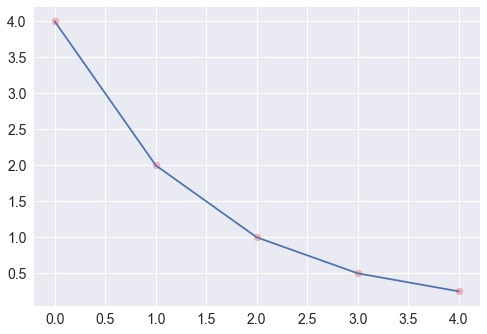

In [43]:
plt.scatter(list(range(T)), X[:, 0], color=(1, 0, 0, .25))
plt.plot(X_pred[:, 0])
plt.show()